In [47]:
import numpy as np
from scipy.stats import norm, rv_continuous, lognorm
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import random
import seaborn as sns



In [2]:
def list_diff(list_to_diff):
    diffd_list=list()
    for i, elem in enumerate(list_to_diff[:-1]):
        diff = list_to_diff[i+1]-elem
        diffd_list.append(diff)
    return diffd_list

[0.001 0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
 0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  0.999]
20
[-0.13159181262513187, 0.9760085545594306, 1.4417323157558117, 1.6622354067934229, 1.7573759707189138, 1.8756936243177762, 1.8353287299796524, 2.030818843411712, 2.1789774808731686, 2.259288746507927, 2.470380336650109, 2.5913507825431914, 2.9256105362999127, 3.483684569183402, 5.651800372449889]
14
[-0.13159181262513187, 0.9760085545594306, 1.4417323157558117, 1.6622354067934229, 1.7573759707189138, 1.8353287299796524, 2.030818843411712, 2.1789774808731686, 2.259288746507927, 2.470380336650109, 2.5913507825431914, 2.9256105362999127, 3.483684569183402, 5.651800372449889]
[0.049, 0.05, 0.05000000000000002, 0.09999999999999998, 0.10000000000000003, 0.2, 0.10000000000000009, 0.09999999999999998, 0.04999999999999993, 0.050000000000000044, 0.050000000000000044, 0.04999999999999993, 0.04899999999999993]
[1.1076003671845625, 0.46572376119638115, 0.220503091037611

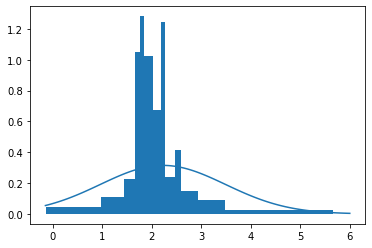

In [4]:

quantiles = np.concatenate([[0.001],np.arange(0.05,0.951,0.05),[0.999]])
values = [-0.13159181262513187, 0.9760085545594306, 1.4417323157558117, 1.7455281052206528, 1.6622354067934229, 1.8604536148410684, 1.7573759707189138, 1.8756936243177762, 2.0335967920298215, 1.8774785990642666, 1.8353287299796524, 2.036286931936721, 2.030818843411712, 2.204517714943436, 2.1789774808731686,2.259288746507927,2.470380336650109,2.5913507825431914,2.9256105362999127,3.483684569183402,5.651800372449889]

new_quantiles = quantiles
new_values = values
while not all(new_values[i] <= new_values[i+1] for i in range(len(new_values) - 1)):
    old_values = new_values
    old_quantiles = new_quantiles
    new_quantiles = list()
    new_values = list()
    min_val = -10
    prev_quant = 0
    for i, val in enumerate(old_values):
        if val > min_val:
            min_val = val
            new_quantiles.append(old_quantiles[i])
            new_values.append(val)
        else:
            min_val = val
            new_values[-1] = min_val
    print(i)
    print(new_values)

values = new_values
quantiles = new_quantiles
    
quant_diff = list_diff(quantiles)
print(quant_diff)

values_diff = list_diff(values)
print(values_diff)
heights = [quant_diff[i]/val for i, val in enumerate(values_diff)]



print(heights)
fig, ax = plt.subplots()
for i, height in enumerate(heights):
    ax.add_patch(Rectangle((values[i],0), values_diff[i], height))
     

mu, std = norm.fit(values)
pdf = norm(mu, std)

# Generate a range of x values for the plot
x = np.linspace(-0.15, 6, 100)

# Evaluate the PDF at each x value
y = pdf.pdf(x)

plt.plot(x,y)

0.998


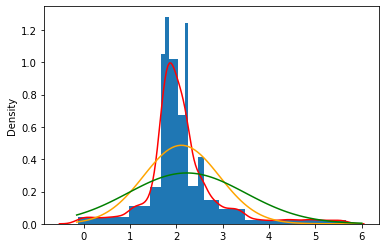

In [55]:
to_sum = [heights[i]*val for i, val in enumerate(values_diff)]
print(sum(to_sum))

def sample_rand_quant(quantiles, values):

    sample_point = random.random()

    for i, quant in enumerate(quantiles):
        if sample_point<quant:
            if i == 0:
                return values[0]
            else:
                diff_val = values[i]-values[i-1]
                diff_quant = quantiles[i]-quantiles[i-1]
                diff_sample = sample_point-quantiles[i-1]
                value_point = values[i-1]+diff_sample*diff_val/diff_quant
                return value_point
    
    return values[-1]

data_to_fit= list()
for i in range(10000):
    new_val = sample_rand_quant(new_quantiles, new_values)
    data_to_fit.append(new_val)

mu, std = norm.fit(data_to_fit)
pdf = norm(mu, std)

fig, ax = plt.subplots()
for i, height in enumerate(heights):
    ax.add_patch(Rectangle((values[i],0), values_diff[i], height))

# Generate a range of x values for the plot
x = np.linspace(-0.15, 6, 100)

# Evaluate the PDF at each x value
y = pdf.pdf(x)

sns.kdeplot(data_to_fit, c="red")

plt.plot(x,y, c="orange")


mu, std = norm.fit(values)
pdf = norm(mu, std)

# Generate a range of x values for the plot
x = np.linspace(-0.15, 6, 100)

# Evaluate the PDF at each x value
y = pdf.pdf(x)

plt.plot(x,y, c="green")
